In [210]:
%matplotlib widget


In [2]:
import geopandas as gpd

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
# data prep
# We want to use the city geometries as locations
# and assign the fraction of total energy from the state.

cities = gpd.read_file('../../data/derived/us_cities_population_fraction.geojson')
total_e = gpd.read_file('../../data/derived/state_year_total_e.csv')

In [3]:
total_e.head(1)

,field_1,StateCode,Year,Data
0,0,AK,1960,59303.0


In [4]:
cities.head(1)

,state,name,population_fraction_in_state,geometry
0,AL,Alabaster,0.013718,POINT (-86.81782 33.2445)


In [7]:
# inner join to get all years
cities = cities.merge(total_e, how = 'inner', left_on='state', right_on='StateCode')

In [8]:
cities.head(5)
# ugh, 'field_i' is an index that got carried around when we saved, ignore

,state,name,population_fraction_in_state,geometry,field_1,StateCode,Year,Data
0,AL,Alabaster,0.013718,POINT (-86.81782 33.2445),64,AL,1960,842283.0
1,AL,Alabaster,0.013718,POINT (-86.81782 33.2445),65,AL,1961,806682.0
2,AL,Alabaster,0.013718,POINT (-86.81782 33.2445),66,AL,1962,853424.0
3,AL,Alabaster,0.013718,POINT (-86.81782 33.2445),67,AL,1963,885811.0
4,AL,Alabaster,0.013718,POINT (-86.81782 33.2445),68,AL,1964,949411.0


In [9]:
cities['state_energy'] = cities['Data'].astype('float')


In [10]:
cities['energy_used'] = cities['state_energy']*cities['population_fraction_in_state']

In [11]:
cities.head()

,state,name,population_fraction_in_state,geometry,field_1,StateCode,Year,Data,state_energy,energy_used
0,AL,Alabaster,0.013718,POINT (-86.81782 33.2445),64,AL,1960,842283.0,842283.0,11554.310618
1,AL,Alabaster,0.013718,POINT (-86.81782 33.2445),65,AL,1961,806682.0,806682.0,11065.941492
2,AL,Alabaster,0.013718,POINT (-86.81782 33.2445),66,AL,1962,853424.0,853424.0,11707.141168
3,AL,Alabaster,0.013718,POINT (-86.81782 33.2445),67,AL,1963,885811.0,885811.0,12151.421129
4,AL,Alabaster,0.013718,POINT (-86.81782 33.2445),68,AL,1964,949411.0,949411.0,13023.876295


In [12]:
cities.Year = cities.Year.astype(int)

In [13]:
print(cities['energy_used'].max())
print(cities['energy_used'].min())

2663539.4421148454
291.6416950701697


In [16]:
# Oh, I need to scale the marker size appropriately & pass as column.
# what's a reasonable range of sizes? Let's try 0.1 - 20 initially & iterate
# ...and I realize I have my math wrong

e_min = 291
e_max = 2663540.0
marker_min = 0.1
marker_max = 40.0

scaling_factor = marker_max / e_max

# scaling_factor = (marker_max * e_min)/(marker_min*e_max)
print(scaling_factor)
cities['marker_size'] = scaling_factor * cities['energy_used']
print(cities['marker_size'].max())
print(cities['marker_size'].min())


1.5017608145550659e-05
39.99999162189936
0.004379760695467982


<Axes: >

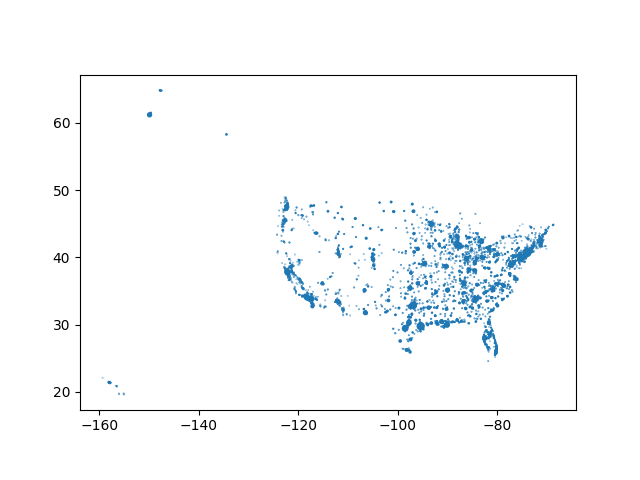

In [17]:
tmp = cities[cities.Year==2023]
tmp.plot(markersize=tmp.marker_size) 
# looking promising, this approach works, though we'll need to tune it up
# especially once we add in marker transparency (assuming I can figure that out)


In [ ]:
# Now we get to experiment with plotting

In [19]:
# add in polygons
us_polygons = gpd.read_file('../../data/derived/us_state_polygons.geojson')
world_polygons = gpd.read_file('../../data/derived/world_polygons.geojson')

In [33]:
from matplotlib.colors import to_rgba

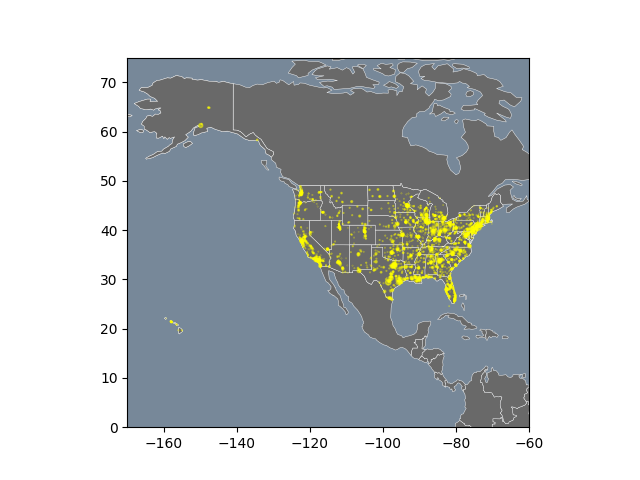

In [49]:
fig, ax = plt.subplots()
world_polygons.plot(ax=ax, color='dimgray', edgecolor='white', linewidth=0.3)
us_polygons.plot(ax=ax, color='dimgray', edgecolor='white', linewidth=0.3)
tmp.plot(ax=ax, markersize=tmp.marker_size, color='yellow', alpha=0.5)
ax.set_ylim([0, 75])
ax.set_xlim([-170, -60])
ax.set_facecolor('lightslategrey')


In [ ]:
# Let's try dialing in the multiplication factor.
# Look at most recent & earliest years & see what makes sense.

In [105]:
def add_scaling_factor(cities, energy_max_value=2663540.0,
                            marker_max_size=1000.0):
    scaling_factor = marker_max_size / energy_max_value
    cities['marker_size'] = scaling_factor * cities['energy_used']
    print(f'{scaling_factor=}')

    return cities

def plot_a_year(year: int,
                cities: gpd.geodataframe=cities,
                year_column:str='Year'):
    tmp = cities[cities[year_column]==year]
    fig, ax = plt.subplots(figsize=(10, 8))
    world_polygons.plot(ax=ax, color='dimgray', edgecolor='white', linewidth=0.3)
    us_polygons.plot(ax=ax, color='dimgray', edgecolor='white', linewidth=0.3)
    tmp.plot(ax=ax, markersize=tmp.marker_size, color='yellow', alpha=0.5)
    # for now, let's stick with CONUS
    ax.set_ylim([23, 52])
    ax.set_xlim([-130, -65])
    ax.set_facecolor('lightslategrey')
    ax.set_title(f'{year=}')

In [106]:
cities = add_scaling_factor(cities)

scaling_factor=0.00037544020363876644


/var/folders/tj/frtvb6y11cgg1cx906dft5n80000gn/T/ipykernel_86072/3019626437.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 8))


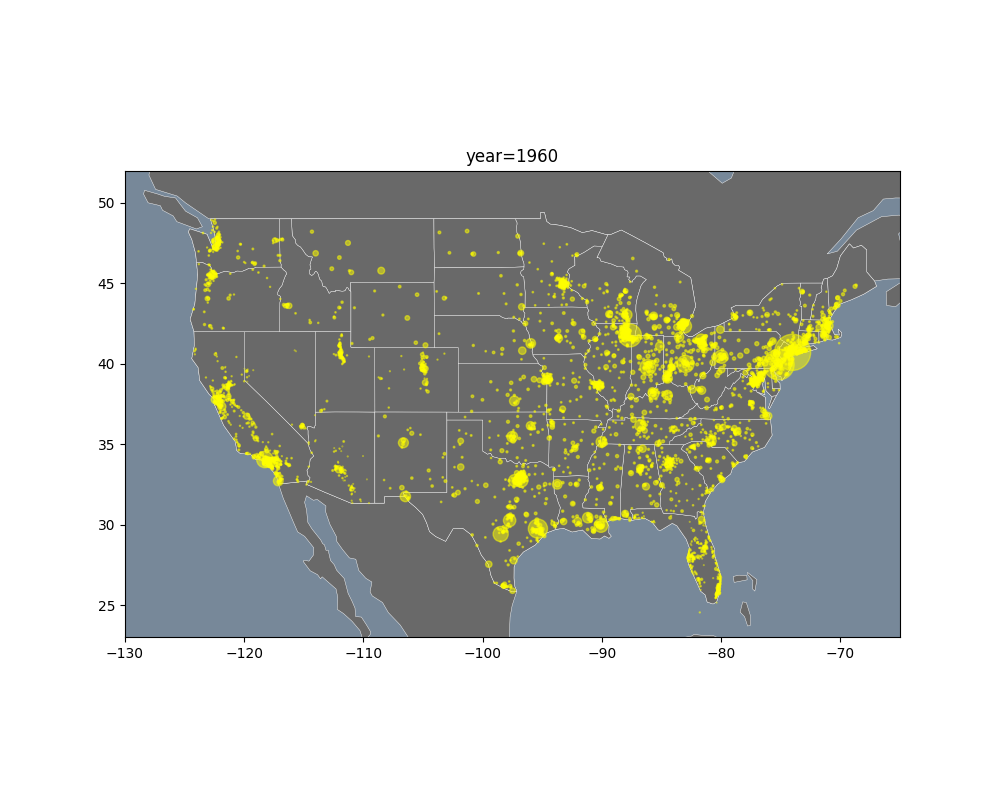

In [107]:
plot_a_year(1960)

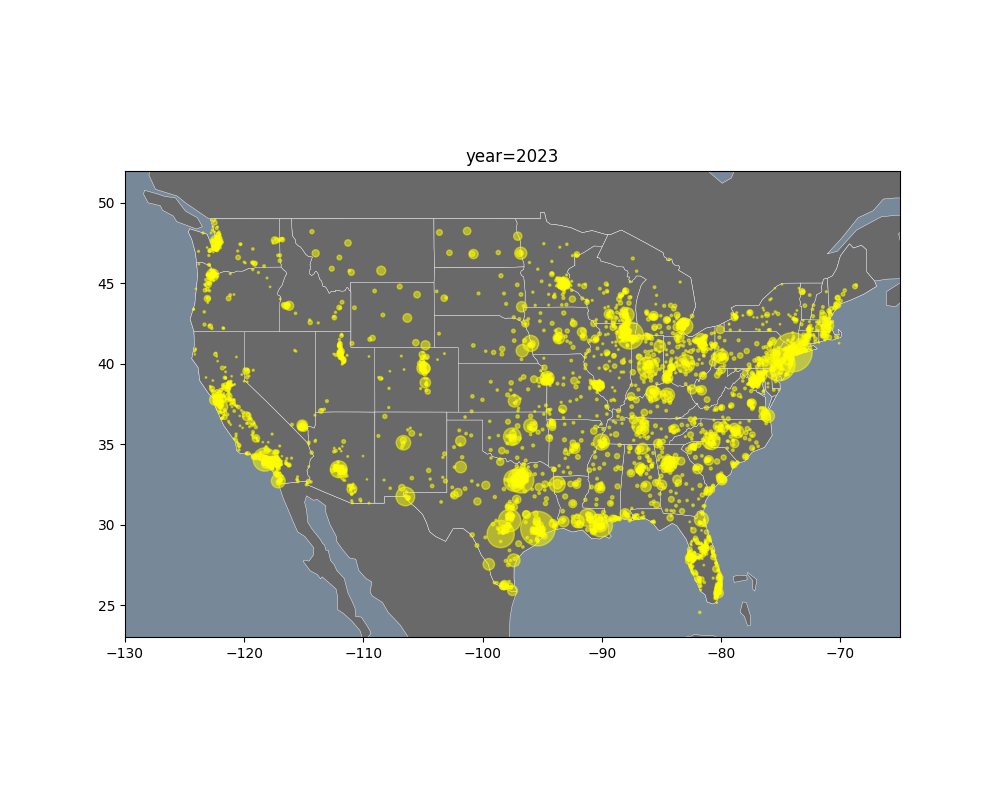

In [108]:
plot_a_year(2023)

In [ ]:
plt.close('all') # clean up plot objects

In [ ]:
# Let's make a movie using lat/lon geometries
# See how the figures look over time.
# https://matplotlib.org/stable/users/explain/animations/animations.html
# https://stackoverflow.com/questions/78609465/animating-yearly-data-from-pandas-in-geopandas-with-matplotlib-funcanimation
# Also, what format do we want to save in? gifs are not scrollable... so maybe worth installing ffmpeg


In [ ]:
import matplotlib.animation as animation

In [126]:
%matplotlib inline

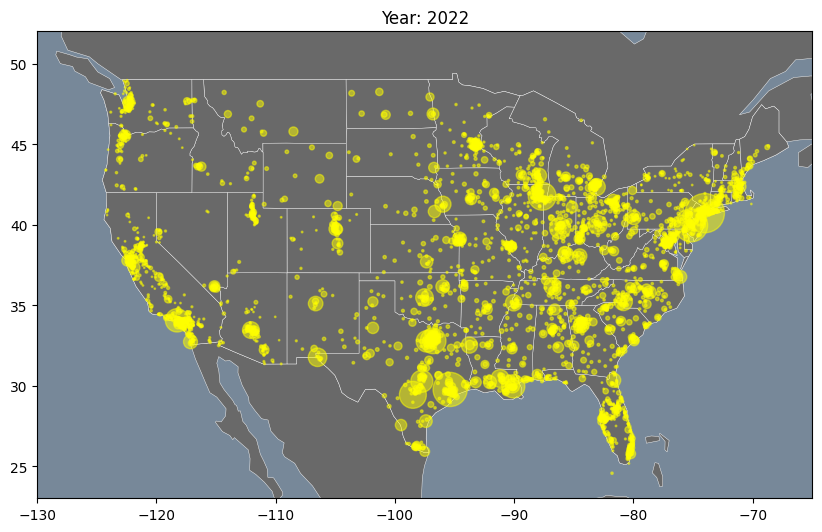

In [ ]:
year = 1960
tmp = cities[cities['Year']==year]
fig, ax = plt.subplots(figsize=(10, 8))
world_polygons.plot(ax=ax, color='dimgray', edgecolor='white', linewidth=0.3)
us_polygons.plot(ax=ax, color='dimgray', edgecolor='white', linewidth=0.3)
city_year = tmp.plot(ax=ax, markersize=tmp.marker_size, color='yellow', alpha=0.5)
# for now, let's stick with CONUS
ax.set_ylim([23, 52])
ax.set_xlim([-130, -65])
ax.set_facecolor('lightslategrey')
ax.set_title(f'Year: {year}')

def update(frame):
    ax.clear()
    # we'll set frame as an iterable from 1961 - 2023
    tmp = cities[cities['Year']==frame]

    world_polygons.plot(ax=ax, color='dimgray', edgecolor='white', linewidth=0.3)
    us_polygons.plot(ax=ax, color='dimgray', edgecolor='white', linewidth=0.3)
    tmp.plot(ax=ax, markersize=tmp.marker_size, color='yellow', alpha=0.5)

    ax.set_ylim([23, 52])
    ax.set_xlim([-130, -65])
    ax.set_facecolor('lightslategrey')
    ax.set_title(f'Year: {frame}')


ani = animation.FuncAnimation(fig=fig, func=update, frames=range(1961, 2024), interval=1000)
# may have to fuss with backend to make this work...
writer = animation.PillowWriter(fps=1)
ani.save('us_cities_animation.gif', writer=writer)

plt.show()

In [116]:
type(range(1960, 2023))

range

In [ ]:
# Let's project this to show a nice curved earth, to imitate a little those at-night 
# need to project coordinates, then plot.
# equal area? EPSG 9311? https://spatialreference.org/ref/epsg/9311/
# Or Albers https://spatialreference.org/ref/epsg/6350/ ? (this one is CONUS though)

In [144]:
cities.columns

Index(['state', 'name', 'population_fraction_in_state', 'geometry', 'field_1',
       'StateCode', 'Year', 'Data', 'state_energy', 'energy_used',
       'marker_size'],
      dtype='object')

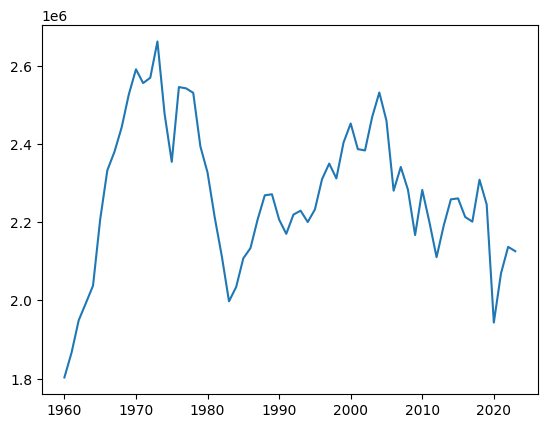

In [ ]:
tmp = cities[cities.name=='New York']
plt.plot(tmp['Year'], tmp['energy_used'])
# wait, what? Statewide energey use has been ~constant?

In [193]:
# Let's get back to the derived data, are our data correct?

# is there an easy way to plot all the statecodes at once.

# total_e.head()
total_e['Data'] = total_e.Data.astype('float')
total_e['Year'] = total_e.Year.astype('int32')

In [160]:
total_e.drop(columns='field_1', inplace=True)

In [195]:
# fig, ax = plt.subplots(figsize=(10, 8))

grp = total_e[total_e.StateCode=='NY']

In [ ]:
# grp.set_index('Year', inplace=True)

In [189]:
grp.head()

,StateCode,Year,Data
2176,NY,1960,2914062.0
2177,NY,1961,3016727.0
2178,NY,1962,3150784.0
2179,NY,1963,3221952.0
2180,NY,1964,3294366.0


In [196]:
grp.dtypes

StateCode     object
Year           int32
Data         float64
dtype: object

In [ ]:
# plt.close('all')

In [203]:
# plot = total_e.groupby('StateCode').plot(kind='line', x='Year', y='Data')
# will wind up plotting a bunch of separate figures, not what we want.

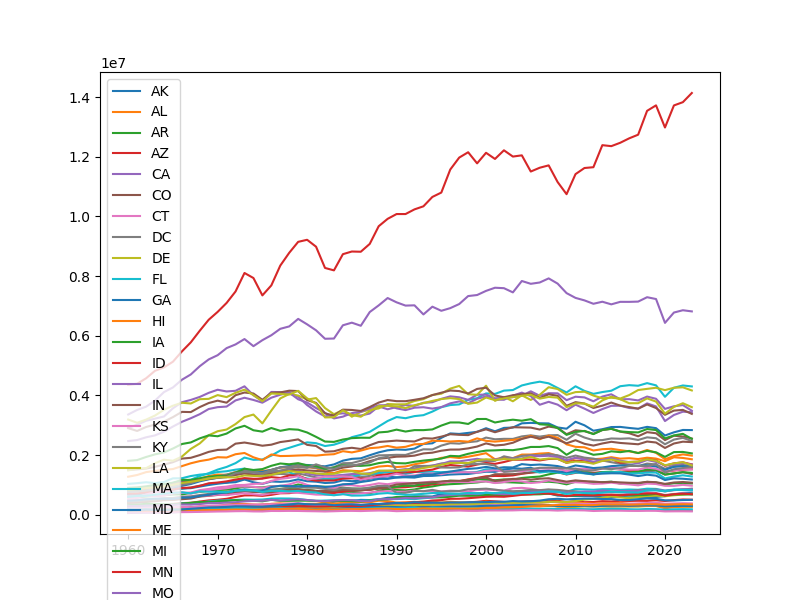

: 

In [ ]:

# Plot the time series from all the states to see what these look like

fig, ax = plt.subplots(figsize=(8, 6))
for key, grp in total_e.groupby('StateCode'):
    if key!='US':
        ax.plot(grp['Year'], grp['Data'], label=f'{key}')
ax.legend(loc="upper left")


# So it looks like the majority of states had energy use stay consistent for much of the last 20 years.
# For example, CA use has been suprisingly steady for the last 30 years
# This data uses TETCB, which is total energy: all sectors & all fuels, for each state.

# Big dip over several years ~1980. Dips for/after 2008 [great recession], 2020 [covid-19].
# Could be interesting to explore the per-capita measure.
